# 翻訳家育成プログラム - 電力データを整理・可視化しよう-サンプルコード
copyright 2019 DataMix Co.,Ltd.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### 試してみよう1 electricity_data2014.csvを読み込んで、先頭5行を出力してみましょう

In [3]:
# 変数名はdataとしてください
data = pd.read_csv("electricity_data2014.csv")

In [5]:
data.head()

,customer_id,year,month,day,dayofweek,hour,value
0,MT_001,2014,1,1,Wednesday,0,10.152284
1,MT_001,2014,1,1,Wednesday,1,11.421320
2,MT_001,2014,1,1,Wednesday,2,11.421320
3,MT_001,2014,1,1,Wednesday,3,11.421320
4,MT_001,2014,1,1,Wednesday,4,10.152284


## 切り口を練るために可視化するtotal_value_by_company = data.groupby(["customer_id"]).aggregate({"value":np.sum}).reset_index()
total_value_by_company.describe()

### 試してみよう2 Pandasによるデータの集計1: 集計関数を使う


### groupby + aggregateで集計する
使い方:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [48]:
total_value_by_company = data.groupby(["customer_id"]).aggregate({"value":np.sum}).reset_index()
total_value_by_company.describe()


,value
count,3.700000e+02
mean,2.125232e+07
std,1.035254e+08
min,0.000000e+00
25%,2.199131e+06
50%,4.402828e+06
75%,1.072068e+07
max,1.692666e+09


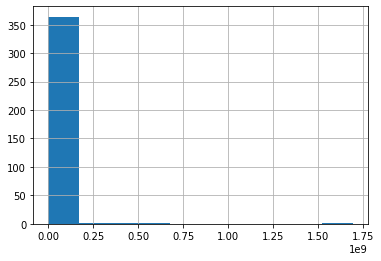

In [49]:
total_value_by_company["value"].hist()


In [58]:
big_clients = list(total_value_by_company[total_value_by_company["value"] > 10000000]["customer_id"])
small_clients = list(total_value_by_company[total_value_by_company["value"] <= 10000000]["customer_id"])
small_df = data[data["customer_id"].isin(small_clients)]
print(small_df)

        customer_id  year  month  day  dayofweek  hour       value
0            MT_001  2014      1    1  Wednesday     0   10.152284
1            MT_001  2014      1    1  Wednesday     1   11.421320
2            MT_001  2014      1    1  Wednesday     2   11.421320
3            MT_001  2014      1    1  Wednesday     3   11.421320
4            MT_001  2014      1    1  Wednesday     4   10.152284
...             ...   ...    ...  ...        ...   ...         ...
3223675      MT_368  2014     12   31  Wednesday    19  158.597663
3223676      MT_368  2014     12   31  Wednesday    20  435.726210
3223677      MT_368  2014     12   31  Wednesday    21  619.365609
3223678      MT_368  2014     12   31  Wednesday    22  781.302170
3223679      MT_368  2014     12   31  Wednesday    23  646.076795

[2382720 rows x 7 columns]


In [59]:
month_df = pd.pivot_table(small_df, columns="month", index="customer_id", values="value", aggfunc=np.mean).reset_index()


In [60]:
target_cols = list(range(1,13))
month_df2 = month_df[target_cols]
month_df2.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
0,9.705393,9.087201,9.558703,11.613438,18.933191,8.932600,9.101577,61.208790,32.947335,6.508924,7.924422,8.465354
1,113.461509,100.564968,93.250509,96.621622,102.503289,107.689268,129.905054,129.560906,118.373637,103.224086,93.077288,91.385422
2,6.739114,6.971164,6.953981,6.851530,6.865232,6.823776,6.853554,6.845380,6.843083,6.851219,6.846703,6.623506
3,560.024915,589.019551,513.113034,481.131436,434.494930,431.035456,437.510928,429.012042,433.875339,434.844611,502.961269,568.761474
4,282.133491,280.155706,226.739116,187.857385,155.205875,152.032520,195.753016,164.568581,167.240854,175.829399,231.365176,281.195909


In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [74]:
month_df2_std = scaler.fit_transform(month_df2.T)
month_df2_std=pd.DataFrame(month_df2_std).T

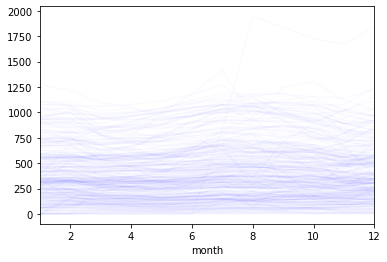

In [75]:
month_df2.T.plot(color='blue', alpha=0.02, legend=False)

In [76]:
from sklearn.cluster import KMeans

In [78]:
km = KMeans(n_clusters=2, random_state=1234)
km.fit(month_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [61]:
hour_df = pd.pivot_table(small_df, columns="hour", index="customer_id", values="value", aggfunc=np.mean).reset_index()

In [65]:
target_cols = list(range(0,23))
hour_df2 = hour_df[target_cols]
hour_df2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,16.194979,16.702594,16.528753,16.619150,16.925110,16.563521,16.650442,17.192824,17.224115,25.485015,...,14.053265,15.350115,16.650442,13.747305,13.462207,15.437035,14.745150,14.856408,16.045477,16.097629
1,95.561098,83.953312,80.173035,78.481654,80.204213,85.323175,96.350280,118.661704,121.237748,119.739278,...,115.736862,112.880220,108.133440,107.174731,109.296752,115.409497,125.411641,126.859448,116.198679,106.030905
2,6.912393,6.379206,6.026921,6.664842,6.788617,7.159944,6.912393,6.912393,7.159944,7.281340,...,6.788617,6.419671,6.419671,6.912393,7.159944,8.028754,7.036169,7.652667,6.912393,6.912393
3,532.230761,445.456064,405.290121,392.755318,380.259494,365.892638,330.827486,365.252255,383.984854,406.910569,...,440.271745,415.747856,421.583695,427.330438,464.439247,573.644058,730.242789,739.553402,707.027509,666.159929
4,232.622787,208.286001,193.244237,186.558637,181.406615,183.260942,170.564651,172.482459,170.995657,165.890411,...,170.527898,174.036084,186.505179,190.247244,208.753759,244.684263,277.454059,278.737053,281.991313,289.021049


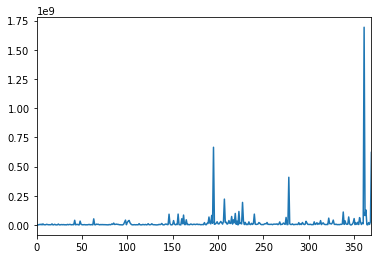

In [7]:
total_value_by_company["value"].plot(x="customer_id", y="value")

### 練習1: 月別の消費電力量を集計する
ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [8]:
monthly_total_value = data.groupby(["month"]).aggregate({"value":np.sum}).reset_index()

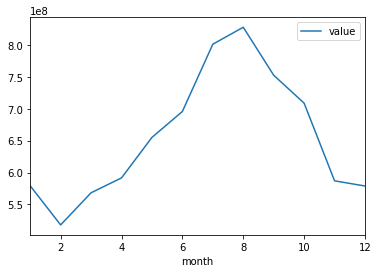

In [9]:
monthly_total_value.plot(x="month", y="value")

### 試してみよう3: Pandasによるデータの集計2: 要素数カウント

ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [10]:
data_non_zero = data[data["value"] > 0]
monthly_total_count = data_non_zero.groupby(["month"])["customer_id"].nunique()

In [11]:
monthly_total_count

month
1     361
2     366
3     368
4     368
5     368
6     368
7     369
8     369
9     369
10    368
11    369
12    369
Name: customer_id, dtype: int64

### 試してみよう4: Pandasによるデータの集計3: pivot table

使い方:  pd.pivot_table(data, columns="横持ちする列", index="集計するキー", values="集計対象する列", aggfunc=集計関数).reset_index()

In [12]:
month_df = pd.pivot_table(data, columns="month", index="customer_id", values="value", aggfunc=np.mean).reset_index()

1月~12月の列を抽出する

In [19]:
target_cols = list(range(1,13))
month_df2 = month_df[target_cols]
month_df2.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
0,9.705393,9.087201,9.558703,11.613438,18.933191,8.932600,9.101577,61.208790,32.947335,6.508924,7.924422,8.465354
1,113.461509,100.564968,93.250509,96.621622,102.503289,107.689268,129.905054,129.560906,118.373637,103.224086,93.077288,91.385422
2,6.739114,6.971164,6.953981,6.851530,6.865232,6.823776,6.853554,6.845380,6.843083,6.851219,6.846703,6.623506
3,560.024915,589.019551,513.113034,481.131436,434.494930,431.035456,437.510928,429.012042,433.875339,434.844611,502.961269,568.761474
4,282.133491,280.155706,226.739116,187.857385,155.205875,152.032520,195.753016,164.568581,167.240854,175.829399,231.365176,281.195909


## 試してみよう5: 平均0, 標準偏差1で標準化
### 横軸に「月」、縦軸に時間あたり消費電力の平均の折れ線グラフ

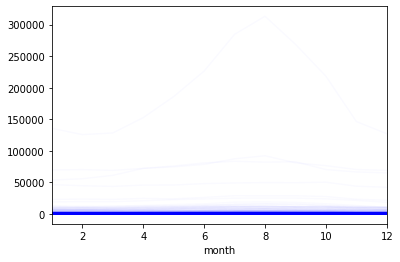

In [20]:
month_df2.T.plot(color='blue', alpha=0.02, legend=False)

大口顧客と小口顧客が混ざっているので見にくいですね。

### StandardScalerで平均0、標準偏差1で標準化する

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
month_df2_std = scaler.fit_transform(month_df2.T)
month_df2_std

array([[-0.42314016,  0.52696357, -1.16231903, ...,  2.36436949,
        -1.0659823 , -1.69920847],
       [-0.46363154, -0.46853859,  1.53737334, ...,  1.77150652,
        -0.99531813, -1.49102732],
       [-0.43274829, -1.03315203,  1.33746801, ..., -0.32001813,
        -0.83851962, -0.95627684],
       ...,
       [-0.63250789, -0.26327756,  0.14191769, ...,  0.59478552,
         0.59016985, -0.04975681],
       [-0.53979322, -1.04652318,  0.08938593, ..., -0.73718024,
        -0.7973861 , -0.42648041],
       [-0.50436233, -1.1771207 , -2.50731314, ..., -0.35544996,
        -0.83082131, -0.56968076]])

In [31]:
month_df_std = pd.DataFrame(month_df2_std).T
month_df_std.columns = list(range(1,13))
month_df_std.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.423140,-0.463632,-0.432748,-0.298164,0.181278,-0.473758,-0.462690,2.950317,1.099200,-0.632508,-0.539793,-0.504362
1,0.526964,-0.468539,-1.033152,-0.772931,-0.318917,0.081396,1.796264,1.769699,0.906138,-0.263278,-1.046523,-1.177121
2,-1.162319,1.537373,1.337468,0.145541,0.304947,-0.177349,0.169089,0.073989,0.047270,0.141918,0.089386,-2.507313
3,1.296297,1.794938,0.489520,-0.060490,-0.862530,-0.922025,-0.810662,-0.956823,-0.873186,-0.856517,0.314933,1.446545
4,1.527310,1.486376,0.380812,-0.423924,-1.099713,-1.165392,-0.260508,-0.905933,-0.850625,-0.672867,0.476558,1.507905


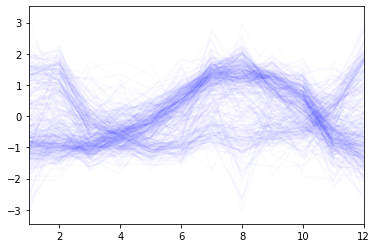

In [32]:
month_df_std.T.plot(color='blue', alpha=0.02, legend=False)

## 試してみよう6:  クラスタリング

In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters=2, random_state=1234)

In [35]:
km.fit(month_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

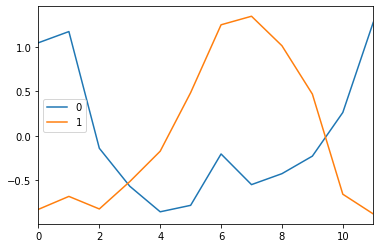

In [36]:
pd.DataFrame(km.cluster_centers_).T.plot()

In [38]:
cluster_labels = km.predict(month_df_std)
cluster_labels

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [39]:
month_df_std["cluster_labels"] = cluster_labels

In [40]:
month_df_std.head()

,1,2,3,4,5,6,7,8,9,10,11,12,cluster_labels
0,-0.423140,-0.463632,-0.432748,-0.298164,0.181278,-0.473758,-0.462690,2.950317,1.099200,-0.632508,-0.539793,-0.504362,1
1,0.526964,-0.468539,-1.033152,-0.772931,-0.318917,0.081396,1.796264,1.769699,0.906138,-0.263278,-1.046523,-1.177121,1
2,-1.162319,1.537373,1.337468,0.145541,0.304947,-0.177349,0.169089,0.073989,0.047270,0.141918,0.089386,-2.507313,1
3,1.296297,1.794938,0.489520,-0.060490,-0.862530,-0.922025,-0.810662,-0.956823,-0.873186,-0.856517,0.314933,1.446545,0
4,1.527310,1.486376,0.380812,-0.423924,-1.099713,-1.165392,-0.260508,-0.905933,-0.850625,-0.672867,0.476558,1.507905,0


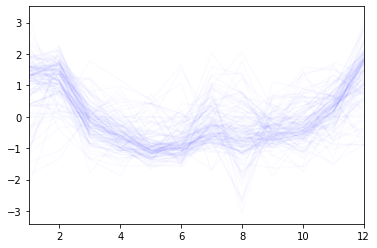

In [41]:
month_df_std[month_df_std["cluster_labels"]==0][list(range(1,13))].T.plot(color='blue', alpha=0.02, legend=False)

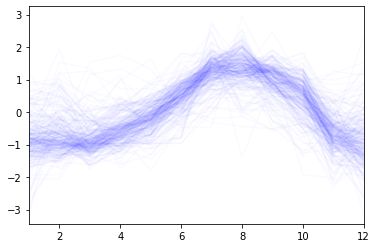

In [42]:
month_df_std[month_df_std["cluster_labels"]==1][list(range(1,13))].T.plot(color='blue', alpha=0.02, legend=False)